In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#Importing the provided dataset
userdata1=pd.read_csv("takehome_users.csv", encoding='ISO-8859-1')
userdata2=pd.read_csv("takehome_user_engagement.csv")
print(userdata1.shape)
print(userdata2.shape)

(12000, 10)
(207917, 3)


In [29]:
#Merge the two userdatasets
merged_data = pd.merge(userdata1, userdata2, left_on='object_id' , right_on='user_id')
print(merged_data.shape)
print(merged_data.columns)
#print(merged_data)

(207917, 13)
Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'user_id', 'visited'],
      dtype='object')


In [ ]:
#Extracting date,week,year,month from timestamp
merged_data['date'] = merged_data['time_stamp'].astype('datetime64')
merged_data['week'] = merged_data['date'].dt.isocalendar().week
merged_data['year'] = merged_data['date'].dt.isocalendar().year
merged_data['month'] = merged_data['date'].dt.month

#Creating DF after grouping with the required data
grouped_data=merged_data.groupby(['user_id','org_id','year' ,'month', 'week' , 'visited']).size()
dff = grouped_data.to_frame(name = 'weekly_visited').reset_index()
print(dff.info)

<bound method DataFrame.info of        user_id  org_id  year  month  week  visited  weekly_visited
0            1      11  2014      4    17        1               1
1            2       1  2013     11    46        1               1
2            2       1  2013     11    48        1               1
3            2       1  2013     12    50        1               1
4            2       1  2013     12    52        1               1
...        ...     ...   ...    ...   ...      ...             ...
75928    11996      89  2013      9    36        1               1
75929    11997     200  2013      1     3        1               1
75930    11998      83  2014      4    17        1               1
75931    11999       6  2012      6    22        1               1
75932    12000       0  2014      1     4        1               1

[75933 rows x 7 columns]>


In [ ]:
#Filtering the "weekly_visit" by 3 or more times of visit
df1 = dff[dff['weekly_visited'] >= 3]
df1

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5
...,...,...,...,...,...,...,...
75886,11975,31,2014,5,21,1,3
75905,11988,114,2014,3,12,1,4
75912,11988,114,2014,4,18,1,3
75915,11988,114,2014,5,20,1,3


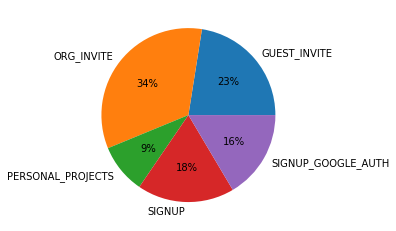

In [ ]:
#Taking data from "creation_source" column
countt= merged_data.groupby(['creation_source']).size()
countt = countt.to_frame(name = 'size').reset_index()

#Pie chart which shows Account "Creation Source" details
y = np.array(countt['size'])
label = np.array(countt['creation_source'])

plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

**The above piechart shows the adoption of users w.r.to creation source**

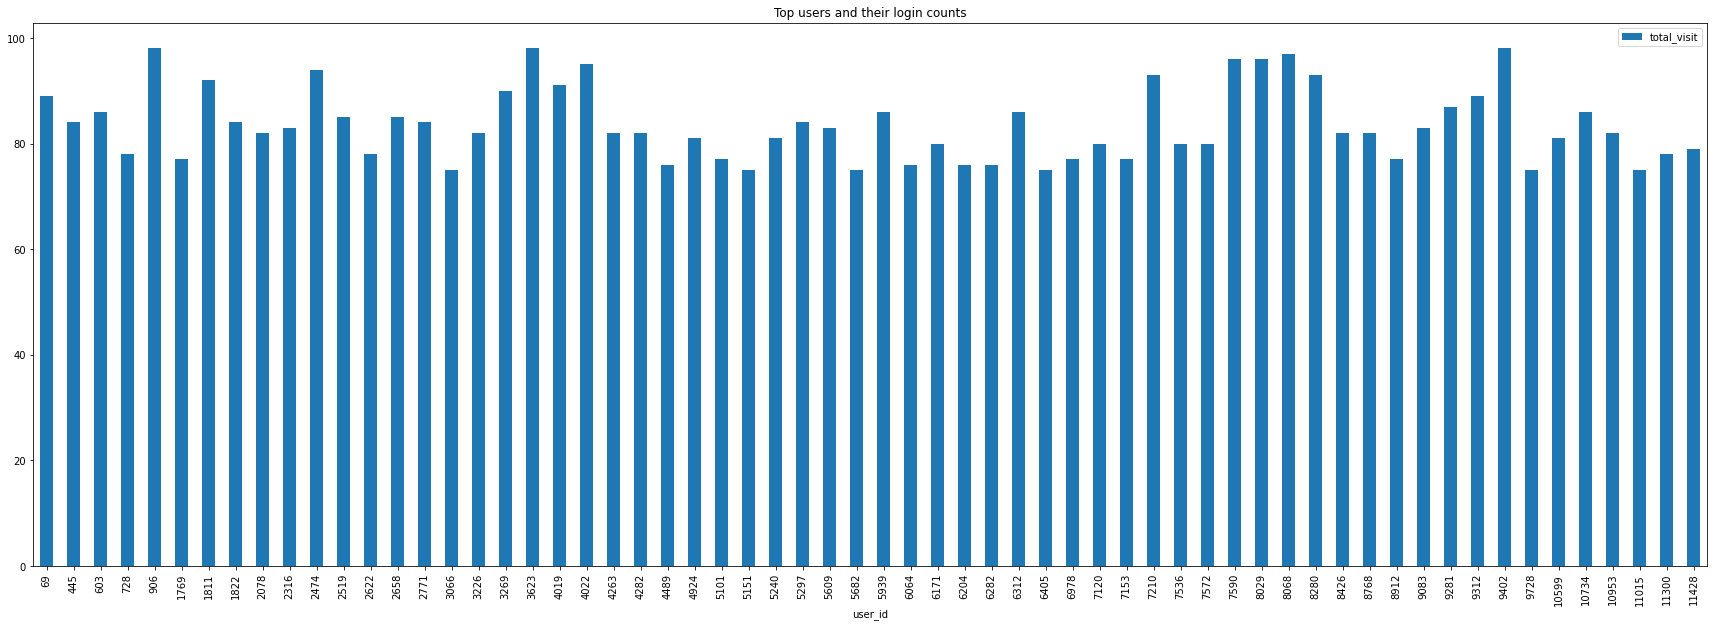

In [ ]:
#Grouping both columns and creating df2
df2 = df1
df2 = df2.groupby(['user_id','org_id']).size()
df2 = df2.to_frame(name = 'total_visit').reset_index()

#Filtering top 25% of users and their login counts
top= df2[df2['total_visit'] >=75]

#Bar chart which shows Top users and their login counts
top.plot.bar(x='user_id', y='total_visit', figsize=(30,10), title="Top users and their login counts")
plt.show()

The above Bar chart uses top users with their login counts

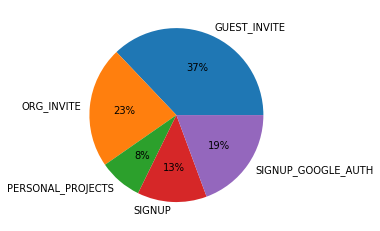

In [ ]:
#Merging the actual data with the top user's data 
top_users= pd.merge(userdata1,top,  left_on='object_id' , right_on='user_id')

cnt= top_users.groupby(['creation_source']).size()
cnt=cnt.to_frame(name='size').reset_index()

#Pie chart which shows the user adoption in top users
y=np.array(cnt['size'])
label=np.array(cnt['creation_source'])

plt.pie(y, labels= label, autopct='%1.0f%%')
plt.show()

**Most of the top users are from Org_Invite,Guest_Invite,Signup_google_auth**